In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pr_CSV_Files/AcademicPerformance_New.csv')

In [3]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [4]:
df.tail()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes
98,99.0,India,58.0,67.0,NaN,41.666667,B,No


In [5]:
df.describe()

,Roll No,WT,DSBDA,AI,Average
count,98.000000,91.000000,95.000000,89.000000,98.000000
mean,50.479592,61.164835,64.652632,62.235955,58.663265
std,28.469274,14.995009,14.893072,16.216590,16.518482
min,1.000000,18.000000,26.000000,20.000000,26.000000
25%,26.250000,51.000000,54.500000,52.000000,45.250000
50%,50.500000,63.000000,66.000000,63.000000,59.333333
75%,74.750000,71.000000,74.000000,74.000000,71.916667
max,99.000000,97.000000,95.000000,92.000000,91.666667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [7]:
df.isnull()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,True,True,True,True,True,True,True,True
3,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
94,False,False,False,True,True,False,False,False
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [9]:
#Removing Null values

In [10]:
df.dropna(subset = ['Roll No'], inplace = True)

In [11]:
df.isnull().sum()

Roll No        0
NationalITy    0
WT             7
DSBDA          3
AI             9
Average        0
Grade          0
PG             0
dtype: int64

In [12]:
# replacing null w/ mean


In [13]:
df['WT'] = df['WT'].fillna(df['WT'].mean())

In [14]:
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].mean())

In [15]:
df['AI'] = df['AI'].fillna(df['AI'].mean())

In [16]:
df.isnull().sum()

Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64

<Axes: ylabel='WT'>

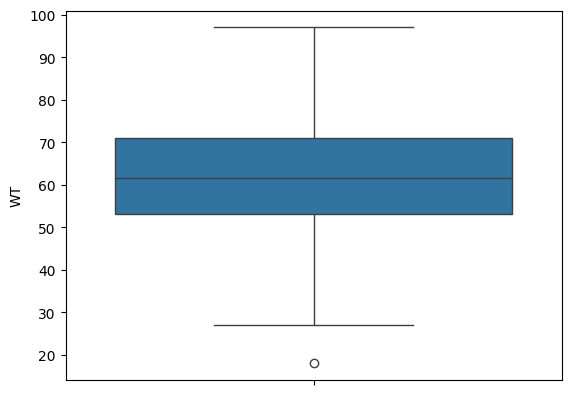

In [17]:
sns.boxplot(df['WT'])

<Axes: ylabel='AI'>

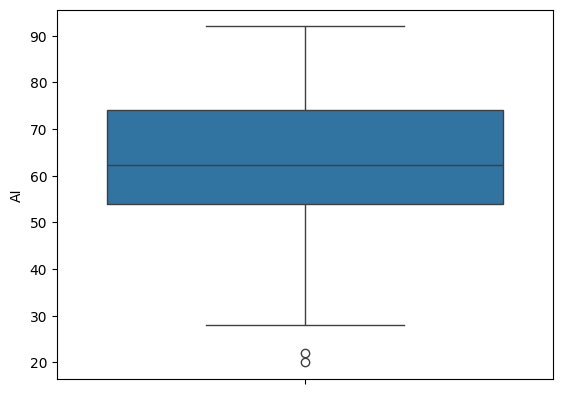

In [18]:
sns.boxplot(df['AI'])

<Axes: ylabel='DSBDA'>

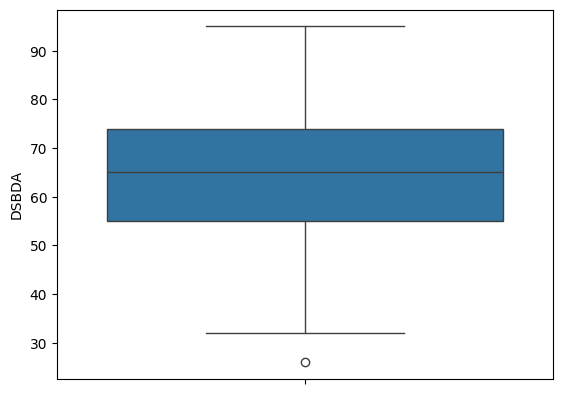

In [19]:
sns.boxplot(df['DSBDA'])

In [22]:
# Calculate z-scores and flag above 2.5
df['WT_zscore'] = (df['WT'] - df['WT'].mean()) / df['WT'].std()

df[df['WT_zscore'].abs() > 2.5]

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,WT_zscore
17,18.0,Rassia,18.0,32.0,28.0,26.0,D,Yes,-2.988464


In [23]:
df['AI_zscore'] = (df['AI'] - df['AI'].mean()) / df['AI'].std()

df[df['AI_zscore'].abs() > 2.5]

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,WT_zscore,AI_zscore
59,60.0,Rassia,70.0,50.0,20.0,46.666667,D,Yes,0.611692,-2.734433
76,77.0,USA,30.0,26.0,22.0,26.000000,D,Yes,-2.157658,-2.604950


In [24]:
df['DSBDA_zscore'] = (df['DSBDA'] - df['DSBDA'].mean()) / df['DSBDA'].std()

df[df['DSBDA_zscore'].abs() > 2.5]

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,WT_zscore,AI_zscore,DSBDA_zscore
76,77.0,USA,30.0,26.0,22.0,26.0,D,Yes,-2.157658,-2.60495,-2.636433


In [26]:
#do similarly for other columns
df = df[~((df['WT_zscore'] < -2.5) | (df['WT_zscore'] > 2.5))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc19b389090>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc19b389310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc19b388f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc19b389590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc19b3896d0>],
 'means': []}

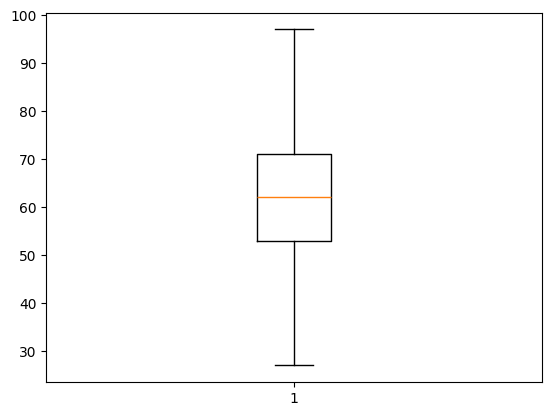

In [27]:
plt.boxplot(df['WT'])